# Logistic Regression
*Implementing logistic regression from scratch with numpy.*

> Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

Considering a binary classification problem, the probability of predicting y is equal to 1 given $x$ is denoted as $p = P(Y=1|x)$. 

Log-odds of the event $Y=1$ is defined as $l=log \left(\frac{p}{1-p}\right)$.

A linear relationship between the log-odds and the dependent variables is assumed and can be represented as $l=\theta_0 + \theta_1x_1 + \dots + \theta_nx_n=\theta^Tx$.

Thus, $\frac{p}{1-p}=e^{\theta^Tx}$. 

It can be derived to: $p=\frac{1}{1+e^{-\theta^Tx}}$.

The sigmoid function is defined as $g(z)=\frac{1}{1+e^{-z}}$.

And finally, $p=g(\theta^Tx)$

In [213]:
import numpy as np
from scipy.optimize import minimize

np.random.seed(0)

## Data
> Build a logistic regression model to predict whether a student gets admitted into a university. For each training example, you have the applicant's scores on two exams and the admissions decision.

In [43]:
data = np.loadtxt('Data/ex2data1.txt', delimiter=',')
X, y = data[:, :2], data[:, 2]
X = np.hstack([np.ones((y.size, 1)), X])
print(X.shape)
X[:10]

(100, 3)


array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331]])

## Compute loss
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def h(X, theta):
    "Compute the prediction of the model."
    return sigmoid(X @ theta)

In [4]:
def compute_loss(theta, X, y):
    "Log loss."
    return -(y * np.log(h(X, theta)) + (1 - y) * np.log(1 - h(X, theta))).mean()

## Gradient descent
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [80]:
def compute_grad(theta, X, y):
    error = h(X, theta) - y
    return (1 / len(X)) * (X.T @ error)

def gradient_descent(X, y, epochs=1000, lr=0.01):
    "Return parameters theta that minimizes the loss."
    theta = np.random.random(X.shape[1])
    for epoch in range(1, epochs + 1):
        theta -= lr * compute_grad(theta, X, y)
        
        if epoch % 100000 == 0:
            loss = compute_loss(theta, X, y)
            print(f'loss: {loss:.2f}')
    return theta

In [81]:
gradient_descent(X, y, epochs=1000000, lr=0.001)

loss: 0.39
loss: 0.32
loss: 0.28
loss: 0.27
loss: 0.25
loss: 0.24
loss: 0.24
loss: 0.23
loss: 0.23
loss: 0.22


array([-15.37575963,   0.12810524,   0.12232271])

My implementation converges too slowly. Now use an optimizer from scipy.

In [83]:
res = minimize(compute_loss, np.random.random(X.shape[1]), (X, y), jac=compute_grad)
loss = res.fun
theta = res.x
loss, theta

/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sbkr014/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning

(0.2034977015894523, array([-25.1613347 ,   0.20623172,   0.2014716 ]))

Wow, much faster and smaller loss.

## Regularization

### Data
> Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

In [137]:
data = np.loadtxt('Data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

In [150]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

import seaborn as sns
sns.set_style('whitegrid')

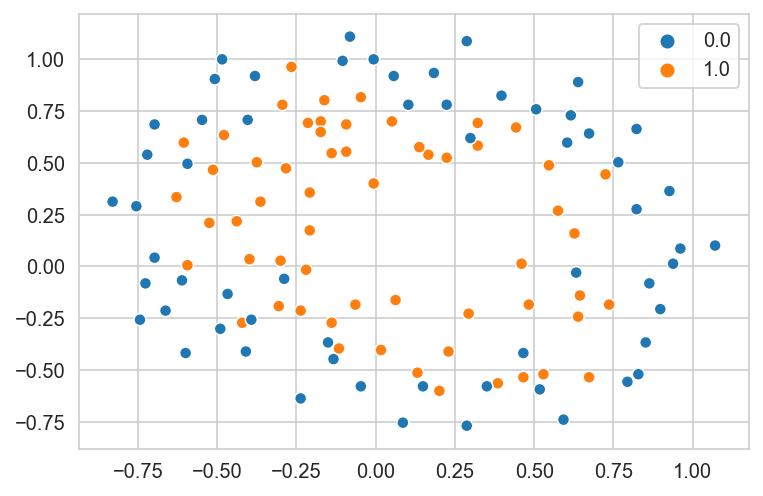

In [158]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

The data isn't linearly separable. We need to add more features to model non-linearity by using the provided utility function.

In [159]:
import utils
X = utils.mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 28)

However, 28 features for 118 data points is too much and it will lead to overfitting. Thus, we will use regularization.

> Regularization is a technique to prevent overfitting by adding penalty to large weights.

The extra cost is $$\frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$


And its gradient is $$\frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$ (no regularization applied to the bias weight).

In [160]:
def compute_loss_reg(theta, X, y, lam):
    "Log loss with regularization."
    y_hat = h(X, theta)
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean() + lam / (2 * len(X)) * (theta ** 2).sum()

In [183]:
def compute_grad_reg(theta, X, y, lam):
    error = h(X, theta) - y
    return (1 / len(X)) * (X.T @ error) + lam / len(X) * theta

def gradient_descent_reg(X, y, epochs=1000, lr=0.01, lam=1):
    "Return parameters theta that minimizes the loss."
    theta = np.random.random(X.shape[1])
    for epoch in range(1, epochs + 1):
        theta -= lr * compute_grad_reg(theta, X, y, lam)
        
        if epoch % 1000 == 0:
            loss = compute_loss_reg(theta, X, y, lam)
            print(f'loss: {loss:.2f}')
    return theta

def compute_accuracy(theta, X, y):
    prob = np.array(h(X, theta))
    pred = np.where(prob > 0.5, 1, 0)
    return np.equal(pred, y).mean()

`sklearn` results on the training set.

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [199]:
logit = LogisticRegression(C=1, max_iter=10000)
logit.fit(X, y)
logit.score(X, y)

0.8305084745762712

In [225]:
theta = gradient_descent_reg(X, y, epochs=10000, lr=0.01, lam=1)
compute_accuracy(theta, X, y)

loss: 0.69
loss: 0.63
loss: 0.60
loss: 0.58
loss: 0.57
loss: 0.56
loss: 0.55
loss: 0.55
loss: 0.55
loss: 0.54


0.8220338983050848

Nice, pretty close.